# Multirate Signal Processing


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [1]:
def my_fft(x_n, fs, fftlen=-1, shifted=True):
    if fftlen < len(x_n): fftlen = len(x_n)
    x_f = np.fft.fft(x_n, fftlen)
    if shifted:
        f = np.arange(-fs/2, fs/2, fs/fftlen)
        x_f = np.fft.fftshift(x_f)
    else:
        f = np.arange(0, fs, fs/fftlen)
    return (f, x_f)

In [4]:
def expand_spectrum(x:np.array, N:int, fs:float, shifted=True)->tuple:
    y = x
    for i in range(0,N-1):
        y = np.hstack((y,x))
    if shifted:
        f = (N*fs) * np.arange(-0.5, 0.5, 1/len(y))
    else:
        f = np.arange(0, N*fs, N*fs/len(y))
    return (f,y)

In [5]:
def gen_summed_cos(N:int, fs:float, f:np.ndarray, amps:np.ndarray)->np.ndarray:
    l = len(f)
    n = np.linspace(np.zeros(l), (N-1)*np.ones(l), N)
    x = np.cos(2*np.pi*n*(f/fs))
    x = amps * x
    return np.sum(x, axis=1) 

In [6]:
def get_nth_row(x:np.ndarray, n:int)->np.ndarray:
    return x[n,:]
def get_nth_col(x:np.ndarray, n:int)->np.ndarray:
    return x[:,n]

In [7]:
def calc_norm_f(fs:float, f:np.ndarray)->np.ndarray:
    return 2*np.pi*(f/fs) # = f_norm
def calc_hertz_f(fs:float, f_norm:np.ndarray)->np.ndarray:
    return (fs*f_norm) / (2*np.pi) 

## Decimation

Decimation is the process of converting a signal from one sampling rate, $f_{s1}$, to a new *lower* sampling rate, $f_{s2}$. Decimation is typically seen as a two step process:
1. Low-Pass Fitler with cutoff $f_{s2}/2$
2. Downsample by by factor or R

*note: for now we will only consider integer values for R. Any arbitrary R is possible but requires special techniques that make things much more comlicated, and warrentsy being studie sepretly.*


Lets run a simulation and see the decimation process in action!

### Step 1: Downsampling

#### Simulation

In [20]:
def downsample(x:np.ndarray, R:int)->np.ndarray:
    return x[0::R] #simply take every Rth sample from x

In [21]:
fs1 = 1000  # Origonal Sampling Rate
R = 2       # Decimation Rate
fs2 = fs1/R # Decimated Sampling Rate

f = np.arange(0,200)
A = np.arange(200,0,-1)
N = 1000

n = np.arange(N)
x = gen_summed_cos(N, fs1, f, A)
y = downsample(x, R) 

f1, X_f = my_fft(x, fs1)
f2, Y_f = my_fft(y, fs2)

X_f[np.argmax(X_f)] = X_f[np.argmax(X_f)] / 2
Y_f[np.argmax(Y_f)] = Y_f[np.argmax(Y_f)] / 2
max = np.max(X_f)
X_f = X_f / max
Y_f = Y_f / max

K = 3
f1_hz, X_f = expand_spectrum(X_f, K, fs1)
f2_hz, Y_f = expand_spectrum(Y_f, K, fs2)

f1_norm = calc_norm_f(fs1, f1_hz)
f2_norm = calc_norm_f(fs2, f2_hz)

del f1
del f2

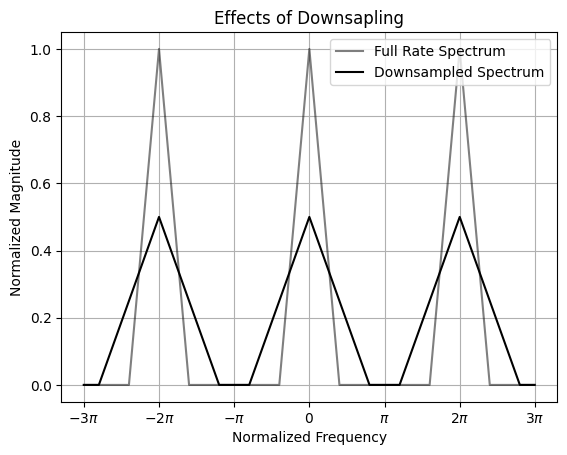

In [22]:
pi = np.pi
ax = plt.subplot(111)
xticks = np.arange(-K*pi, K*pi+1, pi)
plt.plot(f1_norm, X_f, color='k', alpha = 0.5, label='Full Rate Spectrum')
plt.plot(f2_norm, Y_f, color = 'k', alpha = 1, label='Downsampled Spectrum')
plt.xticks(xticks)
x_label = [r'$-3\pi$', r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
ax.set_xticklabels(x_label, fontsize=10)
plt.title('Effects of Downsapling')
plt.xlabel('Normalized Frequency')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.grid()

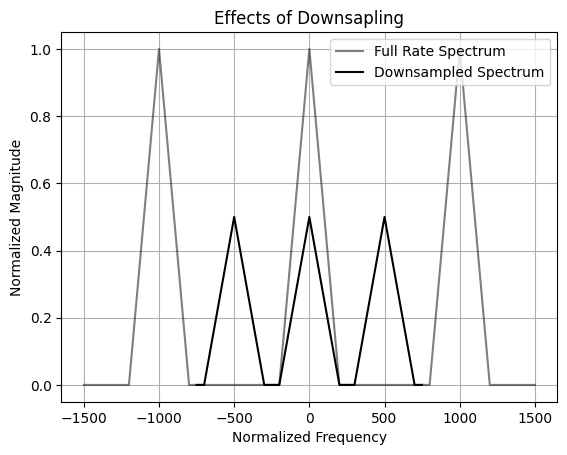

In [23]:
pi = np.pi
ax = plt.subplot(111)
plt.plot(f1_hz, X_f, color='k', alpha = 0.5, label='Full Rate Spectrum')
plt.plot(f2_hz, Y_f, color = 'k', alpha = 1, label='Downsampled Spectrum')
plt.title('Effects of Downsapling')
plt.xlabel('Normalized Frequency')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.grid()

### Filtering 
Once the signal is downsampled the next step is to appl a low-pass filter.

In [26]:
fs1 = 1000  # Origonal Sampling Rate
R = 2       # Decimation Rate
fs2 = fs1/R # Decimated Sampling Rate

f = np.array([50, 200, 220, 457, 325, 97, 285, 337])
A = np.array([1, 1, 3, 4, 1, 1, 1, 1])
N = 1000

n = np.arange(N)
x = gen_summed_cos(N, fs1, f, A)
y = sp.signal.decimate(x, R) 

f1, X_f = my_fft(x, fs1)
f2, Y_f = my_fft(y, fs2)

K = 1
f1_hz, X_f = expand_spectrum(X_f, K, fs1)
f2_hz, Y_f = expand_spectrum(Y_f, K, fs2)

f1_norm = calc_norm_f(fs1, f1_hz)
f2_norm = calc_norm_f(fs2, f2_hz)

del f1
del f2

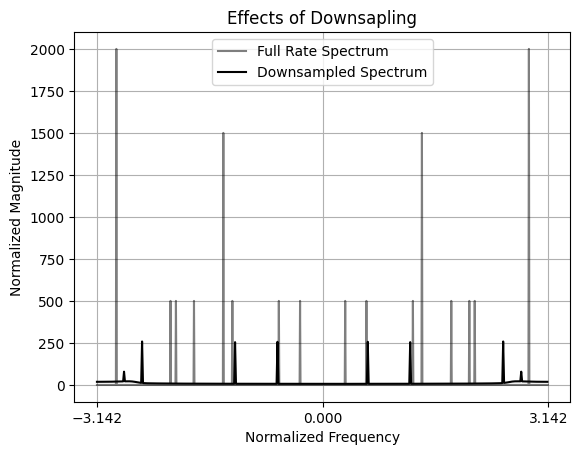

In [27]:
pi = np.pi
ax = plt.subplot(111)
xticks = np.arange(-K*pi, K*pi+1, pi)
plt.plot(f1_norm, X_f, color='k', alpha = 0.5, label='Full Rate Spectrum')
plt.plot(f2_norm, Y_f, color = 'k', alpha = 1, label='Downsampled Spectrum')
plt.xticks(xticks)
#x_label = [r'$-3\pi$', r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$']
#ax.set_xticklabels(x_label, fontsize=10)
plt.title('Effects of Downsapling')
plt.xlabel('Normalized Frequency')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.grid()

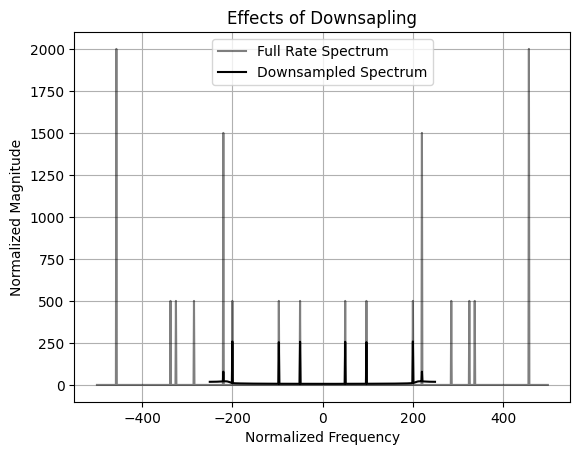

In [28]:
pi = np.pi
ax = plt.subplot(111)
plt.plot(f1_hz, X_f, color='k', alpha = 0.5, label='Full Rate Spectrum')
plt.plot(f2_hz, Y_f, color = 'k', alpha = 1, label='Downsampled Spectrum')
plt.title('Effects of Downsapling')
plt.xlabel('Normalized Frequency')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.grid()